In [26]:
#import libraries
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data RFM/customers nutriflakes.xlsx')
data

,id,customer_name,customer_phone,customer_address,product_name,sales_qty,sales_date,first_purchase_date,last_purchase_date,sales_total,location_name
0,1,Woazatulo,6282286180708,"Desa Hiliwosi -, Mohon Hubungi Cust Sebelum Me...",NUTRIFLAKES,2.0,2022-11-01,2022-10-10,2022-11-01 00:00:00,180000.0,Sumatera Utara
1,2,Dayu Sinta,6282191390954,"Jl. Trans Sulawesi, Kurang Lebih 50 Meter Dari...",NUTRIFLAKES,4.0,2022-11-26,2022-09-01,2023-06-09 00:00:00,320000.0,Sulawesi Tengah
2,2,Dayu Sinta,6282191390954,"Jl. Trans Sulawesi, Kurang Lebih 50 Meter Dari...",NUTRIFLAKES,2.0,2022-06-10,2022-09-01,2023-06-09 00:00:00,150000.0,Sulawesi Tengah
3,3,Josua Sirait,6282274355441,desa parang Julu Simpang Padang bolak Kecamata...,NUTRIFLAKES,3.0,2022-11-01,2022-10-17,2022-11-01 00:00:00,255000.0,Sumatera Utara
4,3,Josua Sirait,6282274355441,desa parang Julu Simpang Padang bolak Kecamata...,NUTRIFLAKES,3.0,2022-10-17,2022-10-17,2022-11-01 00:00:00,255000.0,Sumatera Utara
...,...,...,...,...,...,...,...,...,...,...,...
445679,954971,Gibson,6281374224282,Jalan : Lintas Desa : Tanjungan Kecamatan: Sim...,NUTRIFLAKES,1.0,2023-12-13,2023-12-13,2023-12-13 00:00:00,95000.0,Sumatera Utara
445680,954972,Hafizil,6285329235100,"Jl. Jati IV No.14, Jati Baru, Kec. Padang Tim....",NUTRIFLAKES,1.0,2023-12-13,2023-12-13,2023-12-13 00:00:00,140000.0,Sumatera Barat
445681,954976,Isti,6285275478509,punggulan dusun 7 kec air joman kab asahan kot...,NUTRIFLAKES,3.0,2023-12-13,2023-12-13,2023-12-13 00:00:00,261000.0,Sumatera Utara
445682,954982,Nursina,6285250827410,SD 6 Dobo Desa siwalima Kec pulau pulau Aru Ka...,NUTRIFLAKES,2.0,2023-12-13,2023-12-13,2023-12-13 00:00:00,274000.0,Maluku


In [28]:
# Add the date_analysis column with the specified date
data = data.assign(date_analysis=pd.to_datetime('2023-12-14'))
df = data[['id', 'first_purchase_date', 'last_purchase_date', 'date_analysis', 'customer_name', 'sales_qty', 'location_name']]

print(df)

            id first_purchase_date   last_purchase_date date_analysis  \
0            1          2022-10-10  2022-11-01 00:00:00    2023-12-14   
1            2          2022-09-01  2023-06-09 00:00:00    2023-12-14   
2            2          2022-09-01  2023-06-09 00:00:00    2023-12-14   
3            3          2022-10-17  2022-11-01 00:00:00    2023-12-14   
4            3          2022-10-17  2022-11-01 00:00:00    2023-12-14   
...        ...                 ...                  ...           ...   
445679  954971          2023-12-13  2023-12-13 00:00:00    2023-12-14   
445680  954972          2023-12-13  2023-12-13 00:00:00    2023-12-14   
445681  954976          2023-12-13  2023-12-13 00:00:00    2023-12-14   
445682  954982          2023-12-13  2023-12-13 00:00:00    2023-12-14   
445683  954989          2023-12-13  2023-12-13 00:00:00    2023-12-14   

       customer_name  sales_qty    location_name  
0          Woazatulo        2.0   Sumatera Utara  
1         Dayu Sinta 

In [29]:
df['first_purchase_date'] = pd.to_datetime(df['first_purchase_date'])

df['date_analysis'] = pd.to_datetime(df['date_analysis'])

<ipython-input-29-5c446e47888b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_purchase_date'] = pd.to_datetime(df['first_purchase_date'])
<ipython-input-29-5c446e47888b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_analysis'] = pd.to_datetime(df['date_analysis'])


In [30]:
df['last_purchase_date']  = pd.to_datetime(df.last_purchase_date, format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
print(df['last_purchase_date'])

0        2022-11-01
1        2023-06-09
2        2023-06-09
3        2022-11-01
4        2022-11-01
            ...    
445679   2023-12-13
445680   2023-12-13
445681   2023-12-13
445682   2023-12-13
445683   2023-12-13
Name: last_purchase_date, Length: 445684, dtype: datetime64[ns]


<ipython-input-30-1d0817ed633d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_purchase_date']  = pd.to_datetime(df.last_purchase_date, format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')


In [31]:
grouped_df = df.groupby('id')


In [32]:
# Menggunakan groupby id untuk Recency
grouped_df = df.groupby('id').agg(
    first_purchase_date=('first_purchase_date', 'min'),
    last_purchase_date=('last_purchase_date', 'max'),
    date_analysis=('date_analysis', 'max'),
    location_name=('location_name', 'max')
).reset_index()

In [33]:
grouped_df['recency'] = grouped_df['date_analysis'] - grouped_df['last_purchase_date']
grouped_df['age_cust'] = grouped_df['date_analysis'] - grouped_df['first_purchase_date']
grouped_df['location_name'] = grouped_df['location_name']

In [34]:
result_df = grouped_df[['id', 'first_purchase_date', 'last_purchase_date', 'date_analysis', 'recency', 'age_cust', 'location_name']]
print(result_df)

                                            id first_purchase_date  \
0                                            1          2022-10-10   
1                                            2          2022-09-01   
2                                            3          2022-10-17   
3                                            5          2022-08-31   
4                                            6          2022-08-09   
...                                        ...                 ...   
340480                                  954972          2023-12-13   
340481                                  954976          2023-12-13   
340482                                  954982          2023-12-13   
340483                                  954989          2023-12-13   
340484  Jl. Pasirandu RT.002 RW. 003 Desa Kadu          2022-07-22   

       last_purchase_date date_analysis  recency age_cust        location_name  
0              2022-11-01    2023-12-14 408 days 430 days       Sumatera Utara

In [35]:
# Menggunakan groupby id untuk Frequency
grouped_df1 = df.groupby('id').agg(
    frequency=('customer_name', 'count'),
    avg_basket=('sales_qty', 'mean')
).reset_index()

In [36]:
result_df1 = grouped_df1[['id', 'frequency', 'avg_basket']]
print(result_df1)

                                            id  frequency  avg_basket
0                                            1          1         2.0
1                                            2          2         3.0
2                                            3          2         3.0
3                                            5          7         3.0
4                                            6          5         1.0
...                                        ...        ...         ...
340480                                  954972          1         1.0
340481                                  954976          1         3.0
340482                                  954982          1         2.0
340483                                  954989          1         1.0
340484  Jl. Pasirandu RT.002 RW. 003 Desa Kadu          1         1.0

[340485 rows x 3 columns]


In [13]:
# Menggunakan groupby id untuk Monetery
grouped_df2 = data.groupby('id').agg(
    monetery=('sales_total', 'sum'),
    avg_spend=('sales_total', 'mean')
).reset_index()

In [37]:
result_df2 = grouped_df2[['id', 'monetery', 'avg_spend']]
print(result_df2)

                                            id   monetery  avg_spend
0                                            1   180000.0   180000.0
1                                            2   470000.0   235000.0
2                                            3   510000.0   255000.0
3                                            5  1785000.0   255000.0
4                                            6   459000.0    91800.0
...                                        ...        ...        ...
340480                                  954972   140000.0   140000.0
340481                                  954976   261000.0   261000.0
340482                                  954982   274000.0   274000.0
340483                                  954989    95000.0    95000.0
340484  Jl. Pasirandu RT.002 RW. 003 Desa Kadu   190000.0   190000.0

[340485 rows x 3 columns]


In [38]:
# Menggabungkan Recency, Frequency dan Monetary
data_merge = result_df.merge(result_df1,on='id').merge(result_df2,on='id')
print(data_merge)

                                            id first_purchase_date  \
0                                            1          2022-10-10   
1                                            2          2022-09-01   
2                                            3          2022-10-17   
3                                            5          2022-08-31   
4                                            6          2022-08-09   
...                                        ...                 ...   
340480                                  954972          2023-12-13   
340481                                  954976          2023-12-13   
340482                                  954982          2023-12-13   
340483                                  954989          2023-12-13   
340484  Jl. Pasirandu RT.002 RW. 003 Desa Kadu          2022-07-22   

       last_purchase_date date_analysis  recency age_cust  \
0              2022-11-01    2023-12-14 408 days 430 days   
1              2023-06-09    2023-12-

In [ ]:
### RFM VIZUALIZATION ###

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

MemoryError: ignored

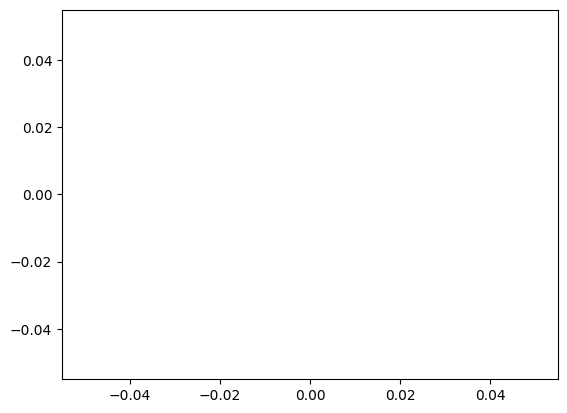

In [41]:


# Histogram
sns.histplot(data_merge['recency'], bins=100, kde=True)
plt.title('Recency Distribution')
plt.show()

# Box plot
sns.boxplot(x=data_merge['frequency'])
plt.title('Frequency Distribution')
plt.show()

# Scatter plot (Recency vs Monetary)
sns.scatterplot(x='recency', y='monetary', data=data_merge)
plt.title('Recency vs Monetary')
plt.show()


In [16]:
### Download data
data_merge.to_excel('data_rfm.xlsx', index=False)

In [17]:
########## DATA OUTLIER Interquartile Range (IQR) ##########

In [18]:
# def remove_outliers(df, column_name):
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

#     return df_filtered

In [19]:
# result_df_filtered = remove_outliers(result_df, 'recency')
# result_df1_filtered = remove_outliers(result_df1, 'frequency')
# result_df2_filtered = remove_outliers(result_df2, 'monetery')

In [20]:
# data_merge_filtered = result_df_filtered.merge(result_df1_filtered, on='id').merge(result_df2_filtered, on='id')
# print("Data setelah menghapus outlier:")
# print(data_merge_filtered)

In [21]:
############## CLUSTERING K MEANS ############

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
data_clust = list(zip(data_merge['frequency'], data_merge['monetery']))
print(data_clust)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

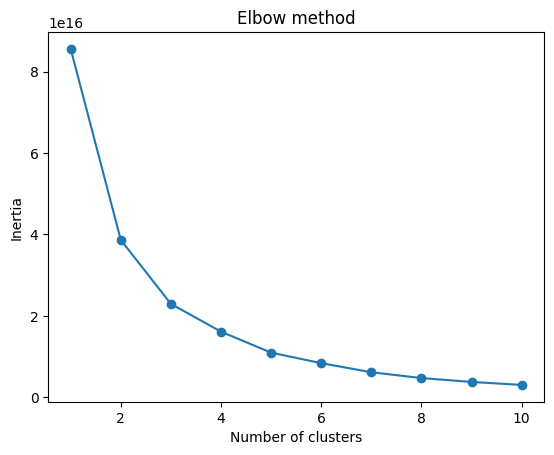

In [24]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_clust)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


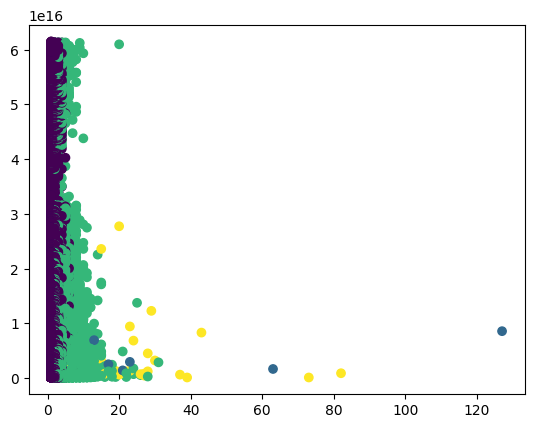

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_clust)

plt.scatter(data_merge['frequency'], data_merge['recency'], c=kmeans.labels_)
plt.show()